# Tensorflow version

## Libraries

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

## Download data

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


## Univariate

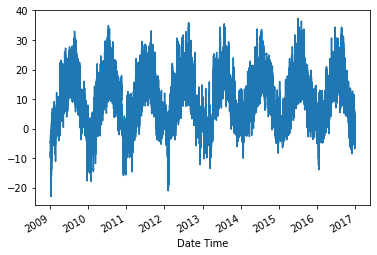

In [5]:
temp = df['T (degC)']
temp.plot()

In [6]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)


In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)

In [8]:
X.shape, y.shape

((420546, 5, 1), (420546,))

In [9]:
X_train, y_train = X[:400000], y[:400000]
X_val, y_val = X[400000: 400000 + 10273], y[400000: 400000 + 10273]
X_test, y_test = X[400000 + 10273:], y[400000 + 10273:]

In [10]:
X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

420546

In [11]:
X_train.shape

(400000, 5, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [13]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
12491/12500 [============================>.] - ETA: 0s - loss: 4.0536 - root_mean_squared_error: 2.0134

12500/12500 [==============================] - 45s 3ms/step - loss: 4.0508 - root_mean_squared_error: 2.0127 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2213
Epoch 2/10
12487/12500 [============================>.] - ETA: 0s - loss: 0.0468 - root_mean_squared_error: 0.2162

12500/12500 [==============================] - 40s 3ms/step - loss: 0.0468 - root_mean_squared_error: 0.2162 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2167
Epoch 3/10
12484/12500 [============================>.] - ETA: 0s - loss: 0.0448 - root_mean_squared_error: 0.2117

12500/12500 [==============================] - 39s 3ms/step - loss: 0.0448 - root_mean_squared_error: 0.2117 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2123
Epoch 4/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.0443 - root_mean_squared_error: 0.2104 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2128
Epoch 5/10
12489/12500 [============================>.] - ETA: 0s - loss: 0.0440 - root_mean_squared_error: 0.2098

12500/12500 [==============================] - 40s 3ms/step - loss: 0.0440 - root_mean_squared_error: 0.2098 - val_loss: 0.0450 - val_root_mean_squared_error: 0.2122
Epoch 6/10
12498/12500 [============================>.] - ETA: 0s - loss: 0.0439 - root_mean_squared_error: 0.2095

12500/12500 [==============================] - 40s 3ms/step - loss: 0.0439 - root_mean_squared_error: 0.2095 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 7/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.0438 - root_mean_squared_error: 0.2092 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2143
Epoch 8/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.0437 - root_mean_squared_error: 0.2091 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2126
Epoch 9/10
12490/12500 [============================>.] - ETA: 0s - loss: 0.0437 - root_mean_squared_error: 0.2089

12500/12500 [==============================] - 39s 3ms/step - loss: 0.0437 - root_mean_squared_error: 0.2089 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2086
Epoch 10/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.0436 - root_mean_squared_error: 0.2087 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

12500/12500 [==============================] - 20s 2ms/step


,Train Predictions,Actuals
0,-8.341728,-8.05
1,-7.913814,-7.62
2,-7.394554,-7.62
3,-7.664901,-7.91
4,-7.990946,-8.43
...,...,...
399995,13.950597,13.93
399996,13.827410,14.01
399997,14.016892,14.06
399998,14.028312,14.15


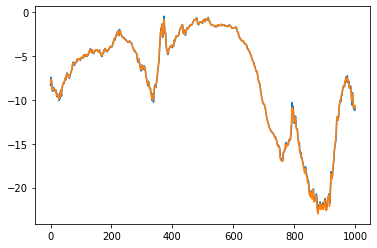

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])

In [18]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

322/322 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,14.762839,14.80
1,14.940259,15.08
2,15.283764,15.67
3,16.035152,16.41
4,16.825226,17.13
...,...,...
10268,13.937818,14.15
10269,14.216069,14.33
10270,14.402870,14.40
10271,14.414556,14.61


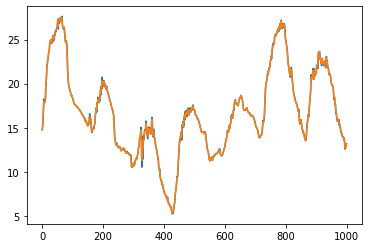

In [19]:
plt.plot(val_results['Val Predictions'][:1000])
plt.plot(val_results['Actuals'][:1000])

In [20]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

322/322 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,14.704919,14.54
1,14.513638,14.46
2,14.459945,14.47
3,14.476306,14.45
4,14.422746,13.82
...,...,...
10268,-4.023595,-4.05
10269,-4.025913,-3.35
10270,-2.989931,-3.16
10271,-3.200174,-4.23


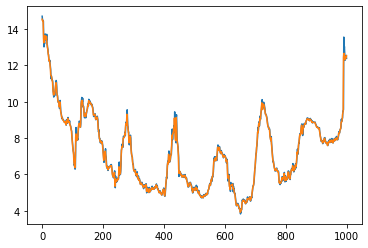

In [21]:
plt.plot(test_results['Test Predictions'][:1000])
plt.plot(test_results['Actuals'][:1000])

In [36]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end], label='Predictions')
  plt.plot(df['Actuals'][start:end], label='Actuals')
  plt.legend()
  return df, mse(y, predictions)

322/322 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0        14.704919    14.54
 1        14.513638    14.46
 2        14.459945    14.47
 3        14.476306    14.45
 4        14.422746    13.82
 ...            ...      ...
 10268    -4.023595    -4.05
 10269    -4.025913    -3.35
 10270    -2.989931    -3.16
 10271    -3.200174    -4.23
 10272    -4.607287    -4.82
 
 [10273 rows x 2 columns], 0.02376451263728121)

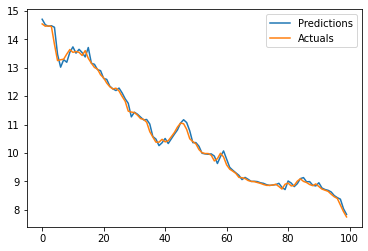

In [67]:
plot_predictions1(model1, X_test, y_test)

In [38]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [39]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [41]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
12497/12500 [============================>.] - ETA: 0s - loss: 0.7338 - root_mean_squared_error: 0.8566

12500/12500 [==============================] - 28s 2ms/step - loss: 0.7336 - root_mean_squared_error: 0.8565 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 2/10
12495/12500 [============================>.] - ETA: 0s - loss: 0.0518 - root_mean_squared_error: 0.2277

12500/12500 [==============================] - 25s 2ms/step - loss: 0.0518 - root_mean_squared_error: 0.2277 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2146
Epoch 3/10
12484/12500 [============================>.] - ETA: 0s - loss: 0.0461 - root_mean_squared_error: 0.2147

12500/12500 [==============================] - 25s 2ms/step - loss: 0.0461 - root_mean_squared_error: 0.2147 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2118
Epoch 4/10
12487/12500 [============================>.] - ETA: 0s - loss: 0.0452 - root_mean_squared_error: 0.2126

12500/12500 [==============================] - 25s 2ms/step - loss: 0.0452 - root_mean_squared_error: 0.2126 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2096
Epoch 5/10
12500/12500 [==============================] - 24s 2ms/step - loss: 0.0451 - root_mean_squared_error: 0.2124 - val_loss: 0.0524 - val_root_mean_squared_error: 0.2290
Epoch 6/10
12500/12500 [==============================] - 24s 2ms/step - loss: 0.0450 - root_mean_squared_error: 0.2121 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2329
Epoch 7/10
12500/12500 [==============================] - 24s 2ms/step - loss: 0.0450 - root_mean_squared_error: 0.2121 - val_loss: 0.0512 - val_root_mean_squared_error: 0.2263
Epoch 8/10
12500/12500 [==============================] - 24s 2ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 9/10
12500/12500 [==============================] - 24s 2ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_

In [42]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [43]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [44]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
12500/12500 [==============================] - 34s 3ms/step - loss: 3.1560 - root_mean_squared_error: 1.7765 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2221
Epoch 2/10
12500/12500 [==============================] - 33s 3ms/step - loss: 0.0457 - root_mean_squared_error: 0.2139 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 3/10
12500/12500 [==============================] - 33s 3ms/step - loss: 0.0444 - root_mean_squared_error: 0.2108 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2111
Epoch 4/10
12500/12500 [==============================] - 33s 3ms/step - loss: 0.0440 - root_mean_squared_error: 0.2098 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2113
Epoch 5/10
12500/12500 [==============================] - 33s 3ms/step - loss: 0.0439 - root_mean_squared_error: 0.2095 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2109
Epoch 6/10
12500/12500 [==============================] - 33s 3ms/step - loss: 0.0438 - root_mean_squared_error: 0.

## Multivariate

In [45]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 00:10:00,-8.02,1.230769e+09
2009-01-01 00:20:00,-8.41,1.230769e+09
2009-01-01 00:30:00,-8.51,1.230770e+09
2009-01-01 00:40:00,-8.31,1.230770e+09
2009-01-01 00:50:00,-8.27,1.230771e+09
...,...,...
2016-12-31 23:20:00,-4.05,1.483226e+09
2016-12-31 23:30:00,-3.35,1.483227e+09
2016-12-31 23:40:00,-3.16,1.483228e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

In [47]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 00:10:00,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,0.216440,0.976296,0.009930,0.999951


In [48]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [49]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((420545, 6, 5), (420545,))

In [52]:
X_train2, y_train2 = X2[:400000], y2[:400000]
X_val2, y_val2 = X2[400000: 400000 + 10273], y2[400000: 400000 + 10273]
X_test2, y_test2 = X2[400000 + 10273:], y2[400000 + 10273:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((400000, 6, 5), (400000,), (10273, 6, 5), (10273,), (10272, 6, 5), (10272,))

In [59]:
temp_training_mean = np.mean(X_train2[:, :, 0])
temp_training_std = np.std(X_train2[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

In [61]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [62]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [63]:
model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp4])

Epoch 1/10
12491/12500 [============================>.] - ETA: 0s - loss: 5.9285 - root_mean_squared_error: 2.4349

12500/12500 [==============================] - 42s 3ms/step - loss: 5.9244 - root_mean_squared_error: 2.4340 - val_loss: 0.1396 - val_root_mean_squared_error: 0.3736
Epoch 2/10
12499/12500 [============================>.] - ETA: 0s - loss: 0.1003 - root_mean_squared_error: 0.3167

12500/12500 [==============================] - 40s 3ms/step - loss: 0.1003 - root_mean_squared_error: 0.3167 - val_loss: 0.0701 - val_root_mean_squared_error: 0.2648
Epoch 3/10
12500/12500 [==============================] - ETA: 0s - loss: 0.0626 - root_mean_squared_error: 0.2501

12500/12500 [==============================] - 40s 3ms/step - loss: 0.0626 - root_mean_squared_error: 0.2501 - val_loss: 0.0649 - val_root_mean_squared_error: 0.2548
Epoch 4/10
12500/12500 [==============================] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2211

12500/12500 [==============================] - 41s 3ms/step - loss: 0.0489 - root_mean_squared_error: 0.2211 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2041
Epoch 5/10
12490/12500 [============================>.] - ETA: 0s - loss: 0.0442 - root_mean_squared_error: 0.2103

12500/12500 [==============================] - 41s 3ms/step - loss: 0.0442 - root_mean_squared_error: 0.2103 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2009
Epoch 6/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.0432 - root_mean_squared_error: 0.2079 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2063
Epoch 7/10
12494/12500 [============================>.] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2071

12500/12500 [==============================] - 40s 3ms/step - loss: 0.0429 - root_mean_squared_error: 0.2071 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1991
Epoch 8/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.0426 - root_mean_squared_error: 0.2064 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2026
Epoch 9/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.0423 - root_mean_squared_error: 0.2057 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2002
Epoch 10/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.0421 - root_mean_squared_error: 0.2053 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011


321/321 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0        14.518678    14.46
 1        14.469899    14.47
 2        14.492895    14.45
 3        14.434870    13.82
 4        13.540770    13.25
 ...            ...      ...
 10267    -4.027270    -4.05
 10268    -4.018827    -3.35
 10269    -2.999395    -3.16
 10270    -3.164018    -4.23
 10271    -4.635499    -4.82
 
 [10272 rows x 2 columns], 0.02348253745435361)

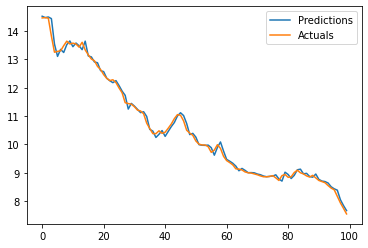

In [64]:
plot_predictions1(model4, X_test2, y_test2)

In [68]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,996.52,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,996.57,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,996.53,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,996.51,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,996.51,-8.27,0.216440,0.976296,0.009930,0.999951


In [69]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [70]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((420544, 7, 6), (420544, 2))

In [71]:
X_train3, y_train3 = X3[:400000], y3[:400000]
X_val3, y_val3 = X3[400000: 400000 + 10273], y3[400000: 400000 + 10273]
X_test3, y_test3 = X3[400000 + 10273:], y3[400000 + 10273:]
X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((400000, 7, 6),
 (400000, 2),
 (10273, 7, 6),
 (10273, 2),
 (10271, 7, 6),
 (10271, 2))

In [73]:
p_training_mean3 = np.mean(X_train3[:, :, 0])
p_training_std3 = np.std(X_train3[:, :, 0])

temp_training_mean3 = np.mean(X_train3[:, :, 1])
temp_training_std3 = np.std(X_train3[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [74]:
preprocess3(X_train3)
preprocess3(X_val3)
preprocess3(X_test3)

In [75]:
preprocess_output3(y_train3)
preprocess_output3(y_val3)
preprocess_output3(y_test3)

array([[ 0.60275184,  0.59723469],
       [ 0.6051594 ,  0.59486284],
       [ 0.60395562,  0.52014929],
       ...,
       [ 1.30696162, -1.49355876],
       [ 1.30575784, -1.62045321],
       [ 1.30696162, -1.69042304]])

In [76]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [77]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [78]:
model5.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp5])

Epoch 1/10
12485/12500 [============================>.] - ETA: 0s - loss: 0.0232 - root_mean_squared_error: 0.1522

12500/12500 [==============================] - 43s 3ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 8.2559e-04 - val_root_mean_squared_error: 0.0287
Epoch 2/10
12493/12500 [============================>.] - ETA: 0s - loss: 9.6477e-04 - root_mean_squared_error: 0.0311

12500/12500 [==============================] - 41s 3ms/step - loss: 9.6445e-04 - root_mean_squared_error: 0.0311 - val_loss: 4.7693e-04 - val_root_mean_squared_error: 0.0218
Epoch 3/10
12489/12500 [============================>.] - ETA: 0s - loss: 6.3120e-04 - root_mean_squared_error: 0.0251

12500/12500 [==============================] - 42s 3ms/step - loss: 6.3095e-04 - root_mean_squared_error: 0.0251 - val_loss: 3.6712e-04 - val_root_mean_squared_error: 0.0192
Epoch 4/10
12496/12500 [============================>.] - ETA: 0s - loss: 5.2284e-04 - root_mean_squared_error: 0.0229

12500/12500 [==============================] - 41s 3ms/step - loss: 5.2281e-04 - root_mean_squared_error: 0.0229 - val_loss: 3.3673e-04 - val_root_mean_squared_error: 0.0184
Epoch 5/10
12500/12500 [==============================] - ETA: 0s - loss: 4.8865e-04 - root_mean_squared_error: 0.0221

12500/12500 [==============================] - 41s 3ms/step - loss: 4.8865e-04 - root_mean_squared_error: 0.0221 - val_loss: 3.3329e-04 - val_root_mean_squared_error: 0.0183
Epoch 6/10
12494/12500 [============================>.] - ETA: 0s - loss: 4.6909e-04 - root_mean_squared_error: 0.0217

12500/12500 [==============================] - 40s 3ms/step - loss: 4.6903e-04 - root_mean_squared_error: 0.0217 - val_loss: 3.1801e-04 - val_root_mean_squared_error: 0.0178
Epoch 7/10
12500/12500 [==============================] - 37s 3ms/step - loss: 4.6235e-04 - root_mean_squared_error: 0.0215 - val_loss: 3.1888e-04 - val_root_mean_squared_error: 0.0179
Epoch 8/10
12500/12500 [==============================] - 37s 3ms/step - loss: 4.5864e-04 - root_mean_squared_error: 0.0214 - val_loss: 3.1980e-04 - val_root_mean_squared_error: 0.0179
Epoch 9/10
12491/12500 [============================>.] - ETA: 0s - loss: 4.5289e-04 - root_mean_squared_error: 0.0213

12500/12500 [==============================] - 41s 3ms/step - loss: 4.5285e-04 - root_mean_squared_error: 0.0213 - val_loss: 3.0427e-04 - val_root_mean_squared_error: 0.0174
Epoch 10/10
12499/12500 [============================>.] - ETA: 0s - loss: 4.5500e-04 - root_mean_squared_error: 0.0213

12500/12500 [==============================] - 40s 3ms/step - loss: 4.5501e-04 - root_mean_squared_error: 0.0213 - val_loss: 3.0242e-04 - val_root_mean_squared_error: 0.0174


In [87]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end], label='Temp_Preds')
  plt.plot(df['Temperature Actuals'][start:end], label='Temp_Acts')
  plt.plot(df['Pressure Predictions'][start:end], label='Press_Preds')
  plt.plot(df['Pressure Actuals'][start:end], label='Press_Acts')
  plt.legend()
  return df[start:end], mse(y[0], predictions[0]), mse(y[1], predictions[1])

321/321 [==============================] - 1s 2ms/step


(    Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                  0.596019             0.597235              0.611605   
 1                  0.599900             0.594863              0.597394   
 2                  0.591902             0.520149              0.602573   
 3                  0.490579             0.452551              0.602493   
 4                  0.431406             0.456109              0.592914   
 ..                      ...                  ...                   ...   
 95                -0.120404            -0.149901              0.000929   
 96                -0.157253            -0.177177             -0.008894   
 97                -0.183461            -0.199710             -0.006732   
 98                -0.204729            -0.223428             -0.007996   
 99                -0.228015            -0.243589             -0.021660   
 
     Pressure Actuals  
 0           0.602752  
 1           0.605159  
 2           0.603956  
 3

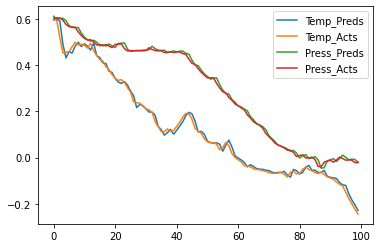

In [88]:
plot_predictions2(model5, X_test3, y_test3)

In [89]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [90]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end], label='Temp_Preds')
  plt.plot(df['Temperature Actuals'][start:end], label='Temp_Acts')
  plt.plot(df['Pressure Predictions'][start:end], label='Press_Preds')
  plt.plot(df['Pressure Actuals'][start:end], label='Press_Acts')
  plt.legend()
  return df[start:end], mse(p_actuals, p_preds), mse(temp_actuals, temp_preds)

321/321 [==============================] - 1s 2ms/step


(    Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                 14.459749                14.47            994.043518   
 1                 14.492473                14.45            993.925476   
 2                 14.425034                13.82            993.968506   
 3                 13.570659                13.25            993.967834   
 4                 13.071701                13.28            993.888245   
 ..                      ...                  ...                   ...   
 95                 8.418722                 8.17            988.970520   
 96                 8.108008                 7.94            988.888977   
 97                 7.887013                 7.75            988.906921   
 98                 7.707681                 7.55            988.896423   
 99                 7.511328                 7.38            988.782898   
 
     Pressure Actuals  
 0             993.97  
 1             993.99  
 2             993.98  
 3

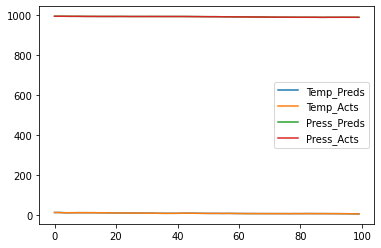

In [91]:
post_processed_df = plot_predictions2(model5, X_test3, y_test3)
post_processed_df

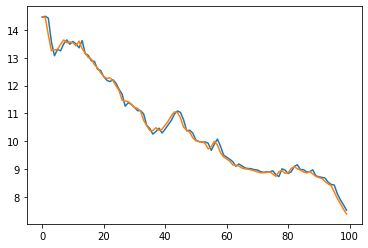

In [94]:
start, end = 0, 100
plt.plot(post_processed_df[0]['Temperature Predictions'][start:end])
plt.plot(post_processed_df[0]['Temperature Actuals'][start:end])

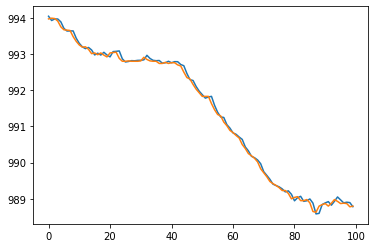

In [95]:
plt.plot(post_processed_df[0]['Pressure Predictions'][start:end])
plt.plot(post_processed_df[0]['Pressure Actuals'][start:end])

In [96]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [97]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [98]:
model6.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp5])

Epoch 1/10
12500/12500 [==============================] - 53s 4ms/step - loss: 0.0182 - root_mean_squared_error: 0.1351 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 2/10
12500/12500 [==============================] - 50s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 6.8023e-04 - val_root_mean_squared_error: 0.0261
Epoch 3/10
12500/12500 [==============================] - 50s 4ms/step - loss: 9.0616e-04 - root_mean_squared_error: 0.0301 - val_loss: 4.2210e-04 - val_root_mean_squared_error: 0.0205
Epoch 4/10
12500/12500 [==============================] - 50s 4ms/step - loss: 6.6157e-04 - root_mean_squared_error: 0.0257 - val_loss: 3.8890e-04 - val_root_mean_squared_error: 0.0197
Epoch 5/10
12500/12500 [==============================] - 50s 4ms/step - loss: 5.6402e-04 - root_mean_squared_error: 0.0237 - val_loss: 3.3532e-04 - val_root_mean_squared_error: 0.0183
Epoch 6/10
12500/12500 [==============================] - 50s 4ms/step - loss: 5.1891e-

321/321 [==============================] - 1s 2ms/step


(    Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                 14.449272                14.47            994.033020   
 1                 14.483297                14.45            993.912598   
 2                 14.400620                13.82            993.947876   
 3                 13.532879                13.25            993.974304   
 4                 13.067645                13.28            993.888855   
 ..                      ...                  ...                   ...   
 95                 8.419765                 8.17            988.962402   
 96                 8.107136                 7.94            988.877319   
 97                 7.893224                 7.75            988.886597   
 98                 7.721227                 7.55            988.876343   
 99                 7.527543                 7.38            988.766907   
 
     Pressure Actuals  
 0             993.97  
 1             993.99  
 2             993.98  
 3

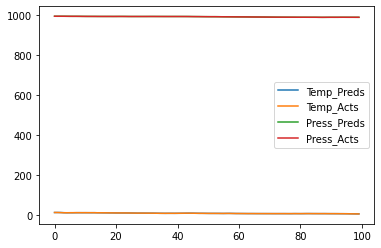

In [99]:
post_processed_df = plot_predictions2(model6, X_test3, y_test3)
post_processed_df

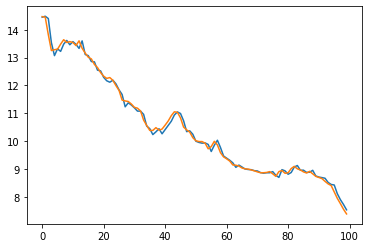

In [100]:
start, end = 0, 100
plt.plot(post_processed_df[0]['Temperature Predictions'][start:end])
plt.plot(post_processed_df[0]['Temperature Actuals'][start:end])

# Pytorch version

In [22]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim 

In [23]:
class TimeSeriesData(Dataset):
  def __init__(self, data, labels, transform=None):
    self.data = data
    self.labels = labels
    self.transform = transform

  def __getitem__(self, index):
    return (torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.labels[index].reshape((1,1)), dtype=torch.float32))

  def __len__(self):
    return self.labels.shape[0]

  


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [25]:
learning_rate = 1e-4
batch_size = 32
num_epochs = 10

In [26]:
train_data, val_data, test_data = TimeSeriesData(X_train, y_train), TimeSeriesData(X_val, y_val), TimeSeriesData(X_test, y_test)

In [27]:
print(len(train_data))
print(train_data[0][0].shape)

400000
torch.Size([5, 1])


In [28]:
class Model(nn.Module):
  def __init__(self, input_dims=5, hidden_dims=64):
    super().__init__()
    self.lstm = nn.LSTM(input_dims, hidden_dims, num_layers=1)
    self.dense1 = nn.Linear(64, 8)
    self.dense2 = nn.Linear(8,1)

  def forward(self, x):
    x = x.reshape(-1, 1,5)
    out = self.lstm(x)[0]
    out = self.dense1(out)
    out = self.dense2(out)

    return out


In [29]:

!nvidia-smi
!nvcc --version

Sun Jan 29 15:03:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |    790MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
!sudo apt install cuda-toolkit-10-2
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-ubuntu1604.pin
!sudo mv cuda-ubuntu1604.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!sudo add-apt-repository "deb http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/ /"
!sudo apt-get update
!sudo apt-get -y install cuda
!sudo apt --fix-broken install
!sudo apt install cuda-cudart-10-2
import os
os.environ['PATH'] = '/usr/local/cuda-11.1/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64:/usr/lib64-nvidia'
!cp "/content/drive/My Drive/cudnn-11.1-linux-x64-v8.0.4.30.tgz" "/content/cudnn-11.1.tgz"
!mkdir cudnn
!tar -C cudnn/ -zxvf cudnn-11.1.tgz
%cd cudnn/
!sudo cp cuda/include/cudnn*.h /usr/local/cuda-11.1/include
!sudo cp cuda/lib64/libcudnn* /usr/local/cuda-11.1/lib64
!sudo chmod a+r /usr/local/cuda-11.1/include/cudnn*.h /usr/local/cuda-11.1/lib64/libcudnn*
!sudo ldconfig
%cd /content/

In [31]:
model = Model().to(device)

RuntimeError: ignored

In [ ]:
model(torch.randn(5,1).cuda()).shape

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print(len(train_data))
print(len(test_data))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

In [ ]:
for epoch in range(num_epochs):
    losses = []

    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

    print(f"Cost at epoch {epoch} is {sum(losses) / len(losses)}")


In [ ]:
X_train[0]

In [ ]:
train_predictions = model(torch.tensor(X_train, dtype=torch.float32).cuda())
# print(train_predictions.detach().cpu().numpy().reshape(-1).shape)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions.detach().cpu().numpy().reshape(-1), 'Actuals':y_train})
train_results


In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])

In [ ]:
val_predictions = model(torch.tensor(X_val, dtype=torch.float32).cuda())

val_results = pd.DataFrame(data={'Val Predictions':val_predictions.detach().cpu().numpy().reshape(-1), 'Actuals':y_val})
val_results


In [ ]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:1000])
plt.plot(val_results['Actuals'][:1000])

In [ ]:
test_predictions = model(torch.tensor(X_test, dtype=torch.float32).cuda())

test_results = pd.DataFrame(data={'Test Predictions':test_predictions.detach().cpu().numpy().reshape(-1), 'Actuals':y_test})
test_results


In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:1000])
plt.plot(test_results['Actuals'][:1000])